# Home Work 4  - Pulsating Stars #

This homework is based on the fitting tutorial at Astropy: http://learn.astropy.org/rst-tutorials/Models-Quick-Fit.html

Make sure to start by importing all the modules you need: 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
#from astroquery.vizier import Vizier
import scipy.optimize
from astropy.io import fits
from astropy.table import Table

# Make plots display in notebooks
%matplotlib inline

Import the data (the file "CepheidData.fit" is the same data file mentioned in the Astropy tutorial, just downloaded in advance; it's real data from Bhardwaj et al. 2017, https://ui.adsabs.harvard.edu/abs/2017A%26A...605A.100B/abstract). This file needs to be in the same directory you run the Notebook it. 

This file is a fits table, which is a common format to save data in astronomy. 

In [2]:
t = Table.read('CepheidData.fit', format='fits')

See what's in the file. 

In [3]:
t.colnames

['VVV-ID',
 'OGLE-ID',
 'Period',
 'Class',
 '__Vmag_',
 '__Imag_',
 '__Jmag_',
 '__Hmag_',
 '__Ksmag_',
 'e__Jmag_',
 'e__Hmag_',
 'e__Ksmag_',
 'E_J-Ks_',
 'Simbad',
 '_RA',
 '_DE',
 'recno']

This catalog has a lot of information, but for this tutorial we are going to work only with periods and magnitudes. Let's grab them using the keywords `'Period'` and `__Ksmag__` (which is the magnitude in the K-band).  Note that `'e__Ksmag_'` refers to the error bars in the magnitude measurements. 

Let's make more readable variable names: 

In [4]:
period = t['Period'] 
log_period = np.log10(period)
k_mag = t['__Ksmag_']
k_mag_err = t['e__Ksmag_']

Let's take a look at the magnitude measurements as a function of period:

Text(0,0.5,'Ks')

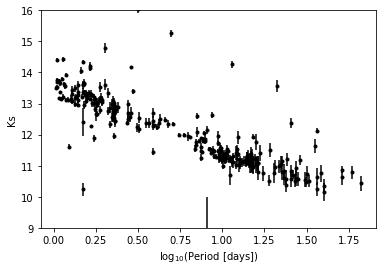

In [5]:
plt.errorbar(log_period, k_mag, k_mag_err, fmt='k.')
plt.ylim(9,16)
plt.xlabel(r'$\log_{10}$(Period [days])')
plt.ylabel('Ks')

This looks reasonably linear, so let's fit a line to it, just like in HW3 (although now with errors). 

In [6]:
model = models.Linear1D()
fitter = fitting.LinearLSQFitter()
best_fit = fitter(model, log_period, k_mag, weights=1.0/k_mag_err**2)
print(best_fit)

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
           slope            intercept     
    ------------------- ------------------
    -2.1623524948222594 13.730890456113654


And let's evaluate it by overplotting the best fit: 

Text(0,0.5,'Ks')

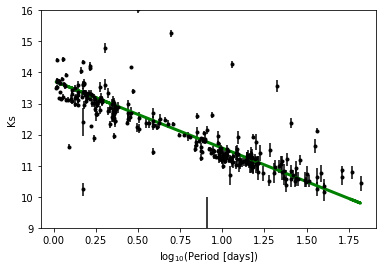

In [7]:
plt.errorbar(log_period,k_mag,k_mag_err,fmt='k.')
plt.plot(log_period, best_fit(log_period), color='g', linewidth=3)
plt.ylim(9,16)
plt.xlabel(r'$\log_{10}$(Period [days])')
plt.ylabel('Ks')

## Your Turn 

Let's see how the relation looks in a different filter (colour). The HW asks for the V-band (visual) relation. Make the same plot as above, but using the V-band magnitude from the file (there are no errors, so you cannot include errors). 

There are zero values in this data which will mess up our fit. We will need to remove them. To do this we can use a really nifty trick using the ```V_mag``` list. This little piece of code ```V_mag=V_mag[V_mag !=0]``` selects all values of the V-band magnitude where $m_V \ne 0$. Do this. Don't forget to also select the period value only for stars where $m_V \ne 0$. Make the plot excluding these zero values, fit a line to the data, and overplot the best fit line. 

Notice that this data is in apparant magnitudes, not absolute, however, this is a sample of Cepheid variables in the bulge of our Galaxy, and Bhardwaj et al. 2017 show that assuming they are all at a distance of $d=8.4$kpc is reasonable. 

Recall that the relationship between aparant and absolute magnitude is: 

$m-M = 5 \log d - 5$, 

where the distance, $d$ is in pc. 

Redo the plot and fit above correcting to absolute V-band magnitude. 

Finally, we'll overplot the best fit from the book in visible light. Notice that it doesn't line up at all!  

In [4]:
#This makes a vector going from 0 to 2 with 20 steps
logP = np.linspace(0,2,20)
Mv = -2.76*logP+2.76*np.log10(10)-4.16

#Uncomment and put this into your plot code as a new line
#plt.plot(logP,Mv,'b-')



To make the lines overlap we have to correct the magnitudes of the Cepheids in the bulge by about 5.5 magnitudes. This is the amount of extinction due to dust along the line of sight (a complication in astronomy we'll discuss further when we discuss the interstellar medium). Redo the plot with this corrected absolute V-band magnitude. 

In [6]:
# Correct for dust extinction
# V_mag_abs=V_mag_abs-5.5